In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split # Creating training & Testing set
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # model 
%matplotlib inline

In [2]:
data=pd.read_csv(r"C:\Users\Lenovo\Downloads\GIRISH IKHE - Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
data.shape

(30, 2)

In [4]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

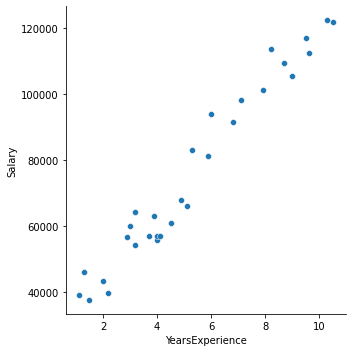

In [5]:
sns.relplot(x="YearsExperience",y="Salary",data=data)

C:\Users\Lenovo\.conda\envs\PY38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

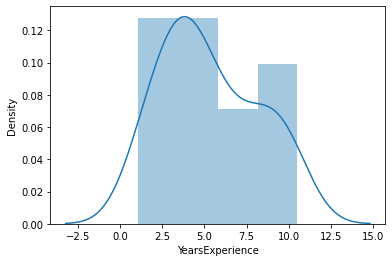

In [6]:
sns.distplot(data["YearsExperience"])

C:\Users\Lenovo\.conda\envs\PY38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

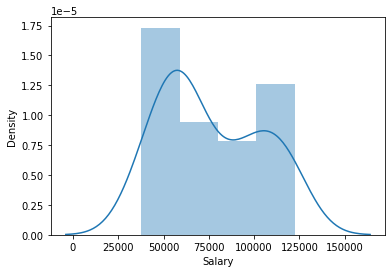

In [7]:
sns.distplot(data["Salary"])

In [8]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [9]:
x=data["YearsExperience"] #independent 
y=data["Salary"]

In [10]:
x.shape 

(30,)

In [11]:
x_matrix=x.values.reshape(-1,1)

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(x_matrix,y,test_size=0.30,random_state=101)

In [13]:
reg=LinearRegression()

In [14]:
reg.fit(X_train,Y_train)

LinearRegression()

In [15]:
reg.coef_

array([9577.17174975])

In [16]:
reg.intercept_

25975.81465954113

In [17]:
X_test

array([[6.8],
       [8.7],
       [3.2],
       [5.9],
       [1.5],
       [9.6],
       [9.5],
       [5.1],
       [9. ]])

In [18]:
predictY=reg.predict(X_test)
predictY

array([ 91100.58255782, 109297.20888234,  56622.76425873,  82481.12798305,
        40341.57228416, 117916.66345711, 116958.94628213,  74819.39058325,
       112170.36040726])

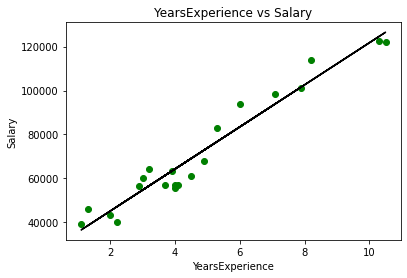

In [19]:
plt.scatter(X_train,Y_train, color='green',)
plt.plot(X_train,reg.predict(X_train), color='black')
plt.title('YearsExperience vs Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

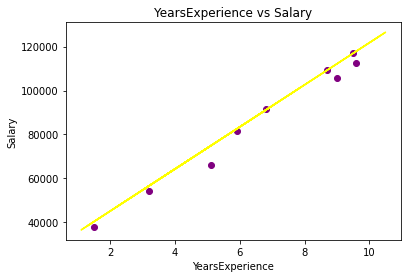

In [20]:
plt.scatter(X_test,Y_test, color='purple',)
plt.plot(X_train,reg.predict(X_train), color='yellow')
plt.title('YearsExperience vs Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, predictY) #Returns mean square error 
print(mse)

17978409.49734415


In [22]:
from math import sqrt
rmse=sqrt(mse)
print(rmse)

4240.095458517903


In [23]:
reg.score(X_train,Y_train)

0.9430010023853349

In [24]:
reg.score(X_test,Y_test)

0.9746363787521536

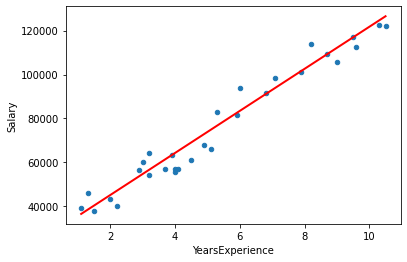

In [27]:
# first, plot the observed data
allpred=reg.predict(x_matrix)
data.plot(kind='scatter', x='YearsExperience', y='Salary')

# then, plot the least squares line
plt.plot(x, allpred, c='red', linewidth=2)

In [28]:
reg.predict(np.array(6.5).reshape(-1,1))

array([88227.43103289])